#Before and After Vaccination Data Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Common libraries and data

####Importing libraries for basic data processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

####Downloading and sorting dataset

In [3]:
#Before and after vaccination - only covid data
global_data = pd.read_csv("/content/drive/MyDrive/Final Year Project/saved data/covidData_withISO.csv")

# #Before Vaccination
# covid_df = pd.read_csv("/content/drive/MyDrive/Final Year Project/saved data/covid_beforeVaccination_dataset.csv")

#After vaccination
covid_df = pd.read_csv("/content/drive/MyDrive/Final Year Project/saved data/covid_afterVaccination_dataset.csv")

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70951 entries, 0 to 70950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 70951 non-null  int64  
 1   Unnamed: 0_x               70951 non-null  int64  
 2   location                   70951 non-null  object 
 3   iso_code                   70951 non-null  object 
 4   total_vaccination_per_day  70951 non-null  float64
 5   Unnamed: 0_y               70951 non-null  int64  
 6   Country/Region             70951 non-null  object 
 7   dates                      70951 non-null  object 
 8   confirmed_cases            70951 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [4]:
global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150540 entries, 0 to 150539
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       150540 non-null  int64 
 1   Country/Region   150540 non-null  object
 2   dates            150540 non-null  object
 3   confirmed_cases  150540 non-null  int64 
 4   iso_code         150540 non-null  object
dtypes: int64(2), object(3)
memory usage: 5.7+ MB


In [5]:
covid_df.dates = pd.to_datetime(covid_df.dates,infer_datetime_format=True)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70951 entries, 0 to 70950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 70951 non-null  int64         
 1   Unnamed: 0_x               70951 non-null  int64         
 2   location                   70951 non-null  object        
 3   iso_code                   70951 non-null  object        
 4   total_vaccination_per_day  70951 non-null  float64       
 5   Unnamed: 0_y               70951 non-null  int64         
 6   Country/Region             70951 non-null  object        
 7   dates                      70951 non-null  datetime64[ns]
 8   confirmed_cases            70951 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 4.9+ MB


In [6]:
covid_df

,Unnamed: 0,Unnamed: 0_x,location,iso_code,total_vaccination_per_day,Unnamed: 0_y,Country/Region,dates,confirmed_cases
0,0,0,Afghanistan,AFG,0.0,397,Afghanistan,2021-02-22,55617
1,1,1,Afghanistan,AFG,1367.0,398,Afghanistan,2021-02-23,55646
2,2,2,Afghanistan,AFG,2734.0,399,Afghanistan,2021-02-24,55664
3,3,3,Afghanistan,AFG,4101.0,400,Afghanistan,2021-02-25,55680
4,4,4,Afghanistan,AFG,5468.0,401,Afghanistan,2021-02-26,55696
...,...,...,...,...,...,...,...,...,...
70946,70946,87816,Zimbabwe,ZWE,4372952.0,154434,Zimbabwe,2022-03-06,6842244
70947,70947,87817,Zimbabwe,ZWE,4375484.0,154435,Zimbabwe,2022-03-07,6906704
70948,70948,87818,Zimbabwe,ZWE,4377788.0,154436,Zimbabwe,2022-03-08,6972949
70949,70949,87819,Zimbabwe,ZWE,4380368.0,154437,Zimbabwe,2022-03-09,7047195


##LSTM / GRU

####Data preprocessing

In [7]:
covid_sorted_df = {}
for country in covid_df['Country/Region'].unique():
  min_date = covid_df[covid_df['Country/Region'] == country].dates.min()
  covid_sorted_df[country] = covid_df[covid_df['Country/Region'] == country].sort_values(by=['dates']).copy()
  covid_sorted_df[country]['days'] = (covid_sorted_df[country].dates - min_date).dt.days

In [8]:
covid_sorted_df['Afghanistan'].days.min()

0

In [9]:
covid_sorted_df['India']

,Unnamed: 0,Unnamed: 0_x,location,iso_code,total_vaccination_per_day,Unnamed: 0_y,Country/Region,dates,confirmed_cases,days
28173,28173,35997,India,IND,0.0,62759,India,2021-01-15,12333,0
28174,28174,35998,India,IND,191181.0,62760,India,2021-01-16,12355,1
28175,28175,35999,India,IND,303331.0,62761,India,2021-01-17,12400,2
28176,28176,36000,India,IND,454681.0,62762,India,2021-01-18,12453,3
28177,28177,36001,India,IND,623390.0,62763,India,2021-01-19,12518,4
...,...,...,...,...,...,...,...,...,...,...
28589,28589,36413,India,IND,967225377.0,63175,India,2022-03-07,28127,416
28590,28590,36414,India,IND,967482854.0,63176,India,2022-03-08,28379,417
28591,28591,36415,India,IND,967743046.0,63177,India,2022-03-09,28583,418
28592,28592,36416,India,IND,967978162.0,63178,India,2022-03-10,29117,419


In [10]:
len(covid_sorted_df) == covid_df['Country/Region'].nunique()

True

####Functios for processing data

In [11]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

####Train test split data

In [12]:
#split 90%-10% as train-test for before vaccination
#split 80%-20% as train-test for after vaccination
train_data = {}
test_data = {}
scaler = {}

for country in covid_sorted_df.keys():
  #data
  scaling_df = global_data[global_data['Country/Region'] == country].copy()
  temp_df = covid_sorted_df[country].copy()

  #Before Vaccination
  train_data_size = int(0.9*temp_df.shape[0])
  
  # #After Vaccination
  # train_data_size = int(0.8*temp_df.shape[0])
  
#Scaling Data=============================================
  #Before Vaccination---------------------------------------
  scaler[country] = MinMaxScaler(feature_range=(0, 1))

  # #Fitting data
  # global_x = scaling_df.confirmed_cases.values
  # global_x = global_x.reshape(len(global_x), 1)
  # scaler[country].fit(global_x)

  #fit and transform data
  x = temp_df.confirmed_cases.values
  x = x.reshape((len(x), 1))
  x = scaler[country].fit_transform(x)
  temp_df.confirmed_cases = np.reshape(x,len(x))
  
  #train data
  train_data[country] = temp_df.head(train_data_size)['confirmed_cases'].to_numpy(copy = True)
  
  #test data
  test_data[country] = temp_df.tail(temp_df.shape[0] - train_data_size)['confirmed_cases'].to_numpy(copy = True)
  
  
  
  # #After Vaccination---------------------------------------
  # scaler[country] = [MinMaxScaler(feature_range=(0, 1)), MinMaxScaler(feature_range=(0, 1))]
  
  # #Fitting data
  # global_x = scaling_df.confirmed_cases.values
  # global_x = global_x.reshape(len(global_x), 1)
  # scaler[country][1].fit(global_x)

  # #transforming data
  # x1 = temp_df.total_vaccination_per_day.values
  # x2 = temp_df.confirmed_cases.values
  # x1 = x1.reshape((len(x1), 1))
  # x2 = x2.reshape((len(x2), 1))
  # x1 = scaler[country][0].fit_transform(x1)
  # x2 = scaler[country][1].transform(x2)
  # temp_df.total_vaccination_per_day = np.reshape(x1, len(x1))
  # temp_df.confirmed_cases = np.reshape(x2, len(x2))
  
  # #train data
  # train_data[country] = temp_df.head(train_data_size)[['total_vaccination_per_day', 'confirmed_cases']].to_numpy(copy = True)
  
  # #test data
  # test_data[country] = temp_df.tail(temp_df.shape[0] - train_data_size)[['total_vaccination_per_day','confirmed_cases']].to_numpy(copy = True)

In [13]:
train_data['Afghanistan'][-5:]

array([0.87447569, 0.87655193, 0.8795444 , 0.88324297, 0.88586559])

In [14]:
train_data.keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Congo (Kinshasa)', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 

In [15]:
(train_data['Afghanistan'].shape, test_data['Afghanistan'].shape)

((340,), (38,))

In [16]:
#train data for model
train_x = {}
train_y = {}
#test data for model
test_x = {}
test_y = {}

#creating data for model
look_back = 7                 #change this value to select number of timestamps
for country in train_data.keys():
  train_x[country], train_y[country] = create_dataset(train_data[country], look_back)
  test_x[country], test_y[country] = create_dataset(test_data[country], look_back)
  
 #shape (sample, timesteps, features)
  # #AfterVaccination
  # train_x[country] = np.reshape(train_x[country], (train_x[country].shape[0], look_back, train_data[country].shape[1]))
  # test_x[country] = np.reshape(test_x[country], (test_x[country].shape[0], look_back, test_data[country].shape[1]))
  
  #BeforeVaccination
  train_x[country] = np.reshape(train_x[country], (train_x[country].shape[0], look_back, 1))
  test_x[country] = np.reshape(test_x[country], (test_x[country].shape[0], look_back, 1))

In [17]:
train_x['Afghanistan'][-2:]

array([[[0.86960871],
        [0.87156727],
        [0.87335771],
        [0.8736267 ],
        [0.87447569],
        [0.87655193],
        [0.8795444 ]],

       [[0.87156727],
        [0.87335771],
        [0.8736267 ],
        [0.87447569],
        [0.87655193],
        [0.8795444 ],
        [0.88324297]]])

In [18]:
train_y['Afghanistan'][-2:]

array([0.88324297, 0.88586559])

In [19]:
train_x['Afghanistan'].shape, train_y['Afghanistan'].shape

((333, 7, 1), (333,))

####Importing libraries for model

In [20]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

####Applying model

In [21]:
from keras import backend

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

In [22]:
# custom_countries = {'India', 'US', 'Japan', 'Australia', 'Canada', 'China', 'France', 'Germany', 'Singapore', 'South Africa', 'Korea, South', 'United Kingdom' }
custom_countries = {'India', 'US', 'Australia', 'Albania', 'United Kingdom', 'South Africa' }

####LSTM

In [23]:
# for country in custom_countries:
# # for country in train_x.keys():
#   print(f"\n Country:{country}")
#   model_lstm = Sequential()
#   model_lstm.add(LSTM(512, return_sequences = True, input_shape = (train_x[country].shape[1], train_x[country].shape[2])))
#   model_lstm.add(LSTM(256, input_shape = (train_x[country].shape[1], train_x[country].shape[2])))
#   # model_lstm.add(LSTM(512, return_sequences = True, input_shape = (look_back, 1)))
#   # model_lstm.add(LSTM(256, input_shape = (look_back, 1)))

#   # #Before Vacciantion
#   # model_lstm.add(Dense(1))
#   #After Vaccination
#   model_lstm.add(Dense(2))

#   model_lstm.compile(loss='mean_squared_error', optimizer = 'adam', metrics=[keras.metrics.RootMeanSquaredError()])
#   model_lstm.fit(train_x[country], train_y[country],batch_size=10, epochs = 1000, verbose = 2, shuffle = False)
  
# #saving model trained
#   # #before vaccination------------------------------------------------------------
#   # filepath = "/content/drive/MyDrive/Final Year Project/LSTM_models/before_vaccination/"
#   #after vacciantion---------------------------------------------------------------
#   filepath = "/content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/"

#   filepath = filepath + country
#   model_lstm.save(filepath)

####GRU

In [24]:
for country in custom_countries:
# for country in train_x.keys():
  print(f"\nCountry: {country}")
  model_LSTM = Sequential()
  model_LSTM.add(LSTM(512, return_sequences = True, input_shape = (train_x[country].shape[1], train_x[country].shape[2])))
  model_LSTM.add(LSTM(256, input_shape = (test_x[country].shape[1], test_x[country].shape[2])))
  
  #Before vaccination----------------------------------------------
  model_LSTM.add(Dense(1))
  # #After Vaccination-----------------------------------------------
  # model_GRU.add(Dense(2))

  model_LSTM.compile(loss='mean_squared_error', optimizer = 'adam', metrics=[keras.metrics.RootMeanSquaredError()])
  # model_GRU.fit(train_x[country], train_y[country],batch_size=10, epochs = 1000, verbose = 2, shuffle = False)
  model_LSTM.fit(train_x[country], train_y[country],batch_size=58, epochs = 2000, verbose = 2, shuffle = False)
  
  #saving model trained
  # #before vaccination
  # filepath = "/content/drive/MyDrive/Final Year Project/GRU_models/before_vaccination/"
  #after vaccination
  filepath = "/content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/"
  
  # filepath = filepath + country + ".h5"
  # model_GRU.save_weights(filepath)

  # filepath = filepath + country + "_1000"
  filepath = filepath + country
  model_LSTM.save(filepath)


Country: United Kingdom
Epoch 1/2000
7/7 - 8s - loss: 0.0073 - root_mean_squared_error: 0.0857 - 8s/epoch - 1s/step
Epoch 2/2000
7/7 - 0s - loss: 0.0104 - root_mean_squared_error: 0.1019 - 103ms/epoch - 15ms/step
Epoch 3/2000
7/7 - 0s - loss: 0.0033 - root_mean_squared_error: 0.0577 - 104ms/epoch - 15ms/step
Epoch 4/2000
7/7 - 0s - loss: 0.0128 - root_mean_squared_error: 0.1130 - 107ms/epoch - 15ms/step
Epoch 5/2000
7/7 - 0s - loss: 0.0035 - root_mean_squared_error: 0.0592 - 100ms/epoch - 14ms/step
Epoch 6/2000
7/7 - 0s - loss: 0.0034 - root_mean_squared_error: 0.0584 - 99ms/epoch - 14ms/step
Epoch 7/2000
7/7 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0397 - 96ms/epoch - 14ms/step
Epoch 8/2000
7/7 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0434 - 96ms/epoch - 14ms/step
Epoch 9/2000
7/7 - 0s - loss: 0.0021 - root_mean_squared_error: 0.0457 - 96ms/epoch - 14ms/step
Epoch 10/2000
7/7 - 0s - loss: 0.0033 - root_mean_squared_error: 0.0579 - 93ms/epoch - 13ms/step
Epoch 11/2000


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/United Kingdom/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/United Kingdom/assets



Country: South Africa
Epoch 1/2000
6/6 - 4s - loss: 0.0158 - root_mean_squared_error: 0.1258 - 4s/epoch - 669ms/step
Epoch 2/2000
6/6 - 0s - loss: 0.0049 - root_mean_squared_error: 0.0699 - 97ms/epoch - 16ms/step
Epoch 3/2000
6/6 - 0s - loss: 0.0121 - root_mean_squared_error: 0.1102 - 91ms/epoch - 15ms/step
Epoch 4/2000
6/6 - 0s - loss: 0.0021 - root_mean_squared_error: 0.0461 - 93ms/epoch - 16ms/step
Epoch 5/2000
6/6 - 0s - loss: 0.0056 - root_mean_squared_error: 0.0751 - 91ms/epoch - 15ms/step
Epoch 6/2000
6/6 - 0s - loss: 0.0044 - root_mean_squared_error: 0.0662 - 92ms/epoch - 15ms/step
Epoch 7/2000
6/6 - 0s - loss: 0.0077 - root_mean_squared_error: 0.0879 - 95ms/epoch - 16ms/step
Epoch 8/2000
6/6 - 0s - loss: 0.0117 - root_mean_squared_error: 0.1084 - 85ms/epoch - 14ms/step
Epoch 9/2000
6/6 - 0s - loss: 0.0080 - root_mean_squared_error: 0.0896 - 87ms/epoch - 14ms/step
Epoch 10/2000
6/6 - 0s - loss: 0.0101 - root_mean_squared_error: 0.1007 - 92ms/epoch - 15ms/step
Epoch 11/2000
6/6

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/South Africa/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/South Africa/assets



Country: Albania
Epoch 1/2000
7/7 - 4s - loss: 0.0172 - root_mean_squared_error: 0.1310 - 4s/epoch - 504ms/step
Epoch 2/2000
7/7 - 0s - loss: 0.0087 - root_mean_squared_error: 0.0933 - 109ms/epoch - 16ms/step
Epoch 3/2000
7/7 - 0s - loss: 0.0034 - root_mean_squared_error: 0.0587 - 109ms/epoch - 16ms/step
Epoch 4/2000
7/7 - 0s - loss: 0.0069 - root_mean_squared_error: 0.0832 - 107ms/epoch - 15ms/step
Epoch 5/2000
7/7 - 0s - loss: 0.0036 - root_mean_squared_error: 0.0601 - 106ms/epoch - 15ms/step
Epoch 6/2000
7/7 - 0s - loss: 0.0011 - root_mean_squared_error: 0.0331 - 107ms/epoch - 15ms/step
Epoch 7/2000
7/7 - 0s - loss: 0.0019 - root_mean_squared_error: 0.0433 - 100ms/epoch - 14ms/step
Epoch 8/2000
7/7 - 0s - loss: 7.4725e-04 - root_mean_squared_error: 0.0273 - 100ms/epoch - 14ms/step
Epoch 9/2000
7/7 - 0s - loss: 6.0076e-04 - root_mean_squared_error: 0.0245 - 115ms/epoch - 16ms/step
Epoch 10/2000
7/7 - 0s - loss: 2.6554e-04 - root_mean_squared_error: 0.0163 - 104ms/epoch - 15ms/step
E

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/Albania/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/Albania/assets



Country: Australia
Epoch 1/2000
6/6 - 4s - loss: 0.0147 - root_mean_squared_error: 0.1213 - 4s/epoch - 678ms/step
Epoch 2/2000
6/6 - 0s - loss: 0.0041 - root_mean_squared_error: 0.0641 - 93ms/epoch - 16ms/step
Epoch 3/2000
6/6 - 0s - loss: 0.0055 - root_mean_squared_error: 0.0742 - 97ms/epoch - 16ms/step
Epoch 4/2000
6/6 - 0s - loss: 0.0057 - root_mean_squared_error: 0.0756 - 94ms/epoch - 16ms/step
Epoch 5/2000
6/6 - 0s - loss: 0.0041 - root_mean_squared_error: 0.0641 - 90ms/epoch - 15ms/step
Epoch 6/2000
6/6 - 0s - loss: 0.0042 - root_mean_squared_error: 0.0647 - 90ms/epoch - 15ms/step
Epoch 7/2000
6/6 - 0s - loss: 0.0010 - root_mean_squared_error: 0.0316 - 95ms/epoch - 16ms/step
Epoch 8/2000
6/6 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0405 - 89ms/epoch - 15ms/step
Epoch 9/2000
6/6 - 0s - loss: 4.9480e-04 - root_mean_squared_error: 0.0222 - 95ms/epoch - 16ms/step
Epoch 10/2000
6/6 - 0s - loss: 5.2523e-04 - root_mean_squared_error: 0.0229 - 96ms/epoch - 16ms/step
Epoch 11/200

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/Australia/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/Australia/assets



Country: India
Epoch 1/2000
7/7 - 4s - loss: 0.0019 - root_mean_squared_error: 0.0441 - 4s/epoch - 505ms/step
Epoch 2/2000
7/7 - 0s - loss: 0.0279 - root_mean_squared_error: 0.1671 - 109ms/epoch - 16ms/step
Epoch 3/2000
7/7 - 0s - loss: 0.0067 - root_mean_squared_error: 0.0820 - 102ms/epoch - 15ms/step
Epoch 4/2000
7/7 - 0s - loss: 0.0117 - root_mean_squared_error: 0.1080 - 105ms/epoch - 15ms/step
Epoch 5/2000
7/7 - 0s - loss: 0.0135 - root_mean_squared_error: 0.1162 - 104ms/epoch - 15ms/step
Epoch 6/2000
7/7 - 0s - loss: 0.0274 - root_mean_squared_error: 0.1657 - 105ms/epoch - 15ms/step
Epoch 7/2000
7/7 - 0s - loss: 9.3338e-04 - root_mean_squared_error: 0.0306 - 105ms/epoch - 15ms/step
Epoch 8/2000
7/7 - 0s - loss: 0.0100 - root_mean_squared_error: 0.0998 - 101ms/epoch - 14ms/step
Epoch 9/2000
7/7 - 0s - loss: 0.0041 - root_mean_squared_error: 0.0639 - 104ms/epoch - 15ms/step
Epoch 10/2000
7/7 - 0s - loss: 0.0046 - root_mean_squared_error: 0.0680 - 111ms/epoch - 16ms/step
Epoch 11/20

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/India/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/India/assets



Country: US
Epoch 1/2000
7/7 - 4s - loss: 0.0147 - root_mean_squared_error: 0.1212 - 4s/epoch - 510ms/step
Epoch 2/2000
7/7 - 0s - loss: 0.0026 - root_mean_squared_error: 0.0508 - 110ms/epoch - 16ms/step
Epoch 3/2000
7/7 - 0s - loss: 0.0013 - root_mean_squared_error: 0.0361 - 105ms/epoch - 15ms/step
Epoch 4/2000
7/7 - 0s - loss: 0.0014 - root_mean_squared_error: 0.0379 - 106ms/epoch - 15ms/step
Epoch 5/2000
7/7 - 0s - loss: 5.6849e-04 - root_mean_squared_error: 0.0238 - 101ms/epoch - 14ms/step
Epoch 6/2000
7/7 - 0s - loss: 1.0124e-04 - root_mean_squared_error: 0.0101 - 109ms/epoch - 16ms/step
Epoch 7/2000
7/7 - 0s - loss: 0.0016 - root_mean_squared_error: 0.0402 - 101ms/epoch - 14ms/step
Epoch 8/2000
7/7 - 0s - loss: 0.0193 - root_mean_squared_error: 0.1389 - 107ms/epoch - 15ms/step
Epoch 9/2000
7/7 - 0s - loss: 0.0216 - root_mean_squared_error: 0.1470 - 105ms/epoch - 15ms/step
Epoch 10/2000
7/7 - 0s - loss: 0.0113 - root_mean_squared_error: 0.1062 - 109ms/epoch - 16ms/step
Epoch 11/2

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/US/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/US/assets


##Prediction

In [25]:
from keras.models import load_model
countryDict = {'India', 'US', 'Australia', 'Albania', 'United Kingdom', 'South Africa' }

###Loading models and libraries (epoch = 2000)

In [26]:
# Saved models loaded from a file
# model_gru = {}
model_lstm = {}

#days for each country
days_train = {}
days_test = {}

#output to change dimension
y_test = {}
y_train = {}

# Variables to store predictions
pred_lstm_test = {}
pred_lstm_train = {}

In [27]:
#Before vaccination
for country in countryDict:
  # model_gru[country] = load_model(f"/content/drive/MyDrive/Final Year Project/GRU_models/before_vaccination/{country}")
  # model_gru[country] = load_model(f"/content/drive/MyDrive/Final Year Project/GRU_models/after_vaccination/{country}")
  model_lstm[country] = load_model(f"/content/drive/MyDrive/Final Year Project/LSTM_models/after_vaccination/{country}")

In [28]:
test_x['India'].shape

(36, 7, 1)

In [29]:
#prediction
for country in countryDict:
  temp_test_df = covid_sorted_df[country].tail(test_y[country].shape[0])
  temp_train_df = covid_sorted_df[country].head(train_y[country].shape[0])
  
  days_test[country] = temp_test_df.dates
  days_train[country] = temp_train_df.dates

  test_pred = model_lstm[country].predict(test_x[country])
  train_pred = model_lstm[country].predict(train_x[country])

  pred_lstm_test[country] = scaler[country].inverse_transform(test_pred)
  # pred_gru_test[country] = test_pred
  pred_lstm_train[country] = scaler[country].inverse_transform(train_pred)
  
  # test_y[country].reshape(-1, 1)
  # train_y[country].reshape(-1, 1)

  # print(test_pred.shape, test_y[country].shape)

  y_test[country] = scaler[country].inverse_transform(test_y[country].reshape(-1, 1))
  y_train[country] = scaler[country].inverse_transform(train_y[country].reshape(-1, 1))

In [30]:
for country in countryDict:
  print(f"{country}:\t{pred_lstm_test[country].shape}")

United Kingdom:	(36, 1)
South Africa:	(32, 1)
Albania:	(36, 1)
Australia:	(32, 1)
India:	(36, 1)
US:	(39, 1)


####Plotting prediction on Test Data

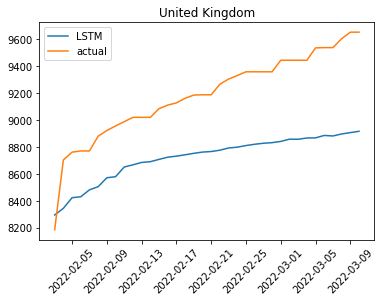

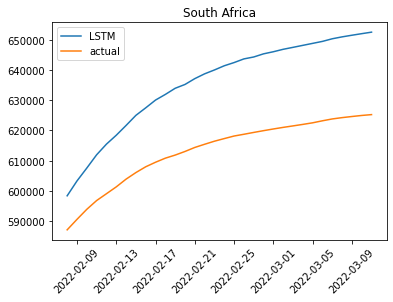

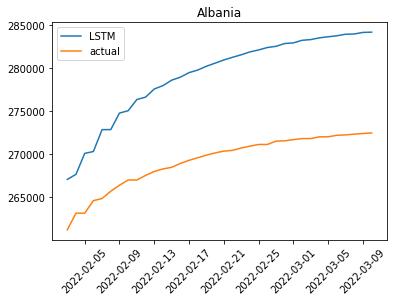

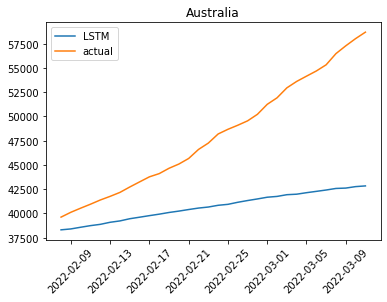

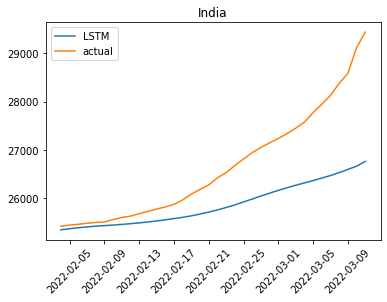

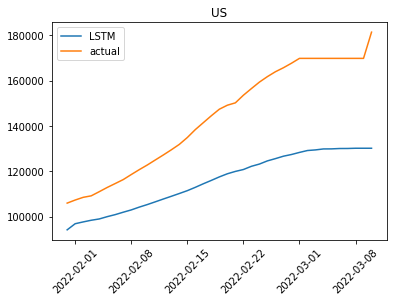

In [31]:
for country in countryDict:
  X =  days_test[country]
  plt.plot(X, pred_lstm_test[country])
  plt.plot(X, y_test[country])
  # plt.legend(['LSTM', 'GRU', 'actual'])
  plt.legend(['LSTM', 'actual'])
  plt.xticks(rotation = 45)
  plt.title(country)
  plt.show()

####Plotting prediction on Training Data

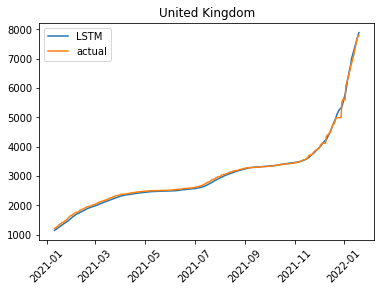

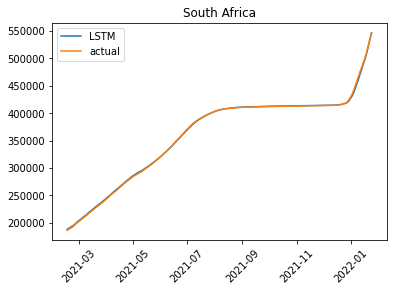

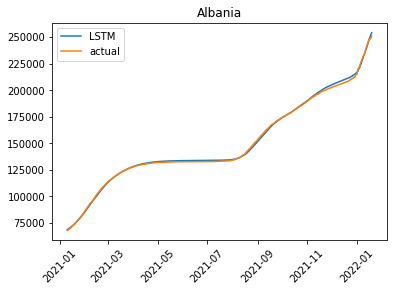

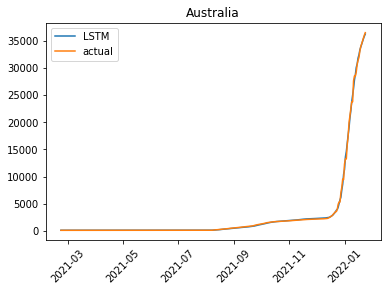

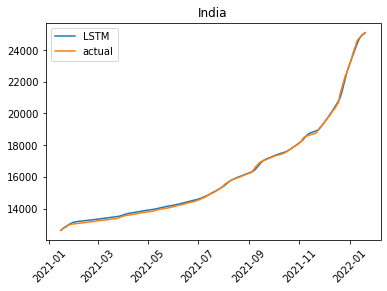

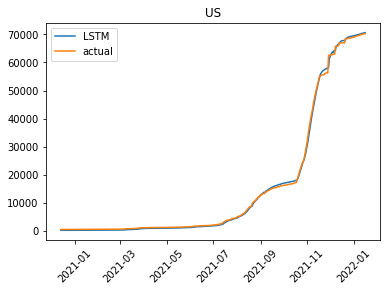

In [32]:
for country in countryDict:
  X =  days_train[country]
  plt.plot(X, pred_lstm_train[country])
  plt.plot(X, y_train[country])
  # plt.legend(['LSTM', 'GRU', 'actual'])
  plt.legend(['LSTM', 'actual'])
  plt.xticks(rotation = 45)
  plt.title(country)
  plt.show()